##Predictive Maintenance for Vehicles
* Problem Statement:
** The goal is to develop a predictive maintenance system for vehicles using machine learning. The system should predict potential failures before they occur, helping reduce downtime, improve safety, and optimize maintenance costs.

### Understand the Industry - Type of Problem
* Industry: Automotive, IoT, Fleet Management, and Smart Vehicles.
* Problem Type: Supervised Learning
** Classification: Predict whether a vehicle component will fail soon (Yes/No).
** Regression: Estimate the remaining useful life (RUL) of a component.

### Understand the Business Objective - Why this Problem & Desired Outcome
####Why this problem?

* Unexpected vehicle breakdowns cause operational losses and safety risks.
* Current maintenance is mostly reactive (after failure) or time-based instead of predictive.
* Predictive maintenance helps in cost reduction, safety improvement, and efficiency.

####Desired Outcome:
* Reduce unexpected breakdowns.
* Minimize maintenance costs by predicting failures early.
* Optimize repair schedules and improve vehicle reliability.

### Constraints & Limitations
####Computational Power:
* Google Colab (free) has limited resources.

####Budget:
* No dedicated budget; must rely on free datasets.

####Data Availability:
* Real-time vehicle sensor data is not available yet; we need open datasets for now.

####Obstacles:
* Hard to get real-world continuous sensor data.
* Need proper feature engineering for accurate failure prediction.

###Evaluation Metrics
####For Classification Models (Failure Prediction - Yes/No):
* Precision & Recall: Important for reducing false positives & false negatives.
* F1-score: Balances precision and recall.
* ROC-AUC Score: Evaluates overall model performance.

####For Regression Models (RUL Prediction):
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)

###Relevancy to the Target Audience

####Users:
* Fleet managers, logistics companies, car manufacturers, personal vehicle owners.

####Real-world Usage:
* The model should predict failures early so users can take preventive actions.

####Prediction Speed:
* Needs real-time inference capability for instant alerts.

###Scope of the Solution

####What it can do:
* Predict component failures.
* Suggest preventive actions based on predictions.

####What it cannot do:
* Perform actual vehicle repairs.
* Work without sensor data in real-world deployment.

### Deployment Considerations
* Google Colab (for model training).
* Cloud-based API (for real-time predictions in the future).
* Web app or mobile app integration (for user-friendly access).

# Data Collection

In [ ]:
# Importing essential libraries
import zipfile
import pandas as pd
import numpy as np

# Defining file paths
zip_path = "/content/vehicle_maintenance_data.csv.zip"
extract_path = "/mnt/data/"

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Finding the extracted CSV file (assuming only one CSV inside)
import os
csv_file = [f for f in os.listdir(extract_path) if f.endswith('.csv')][0]
csv_path = os.path.join(extract_path, csv_file)

# Loading the dataset
df = pd.read_csv(csv_path)

# Displaying basic info
print("Dataset Preview:")
display(df.head())

print("\nDataset Info:")
df.info()

Dataset Preview:


Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Insurance_Premium  \
0        2023-11-23           2025-06-24     Second              20782   
1        2023-09-21           2025-06-04     Second              23489   
2        2023-06-27           2025-04-27      First              17979   
3        2023-08-24           2025-11-05     Second               6220   
4        2023-05-25           2025-09-14      Third              16446   

   Service_History  Accident_History  Fuel_Efficiency Tire_Condition  \
0                6                 3        13.622204            New   
1                7                 0        13.625307            New   
2                7                 0        14.306302            New   
3                7                 3        18.709467            New   
4                6                 2        16.977482           Good   

  Brake_Condition Battery_Status  Need_Maintenance  
0             New           Weak                 1  
1             New           Weak                 1  
2            Good           Weak                 1  
3        Worn Out            New                 1  
4            Good           Weak                 1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel

In [ ]:
# Dataset Rows & Columns count
df.shape

(50000, 20)

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64


In [ ]:
# Column names
print("\nColumn names:", df.columns)


Column names: Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')


In [ ]:
# Summary statistics for numerical columns
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
             Mileage  Reported_Issues   Vehicle_Age   Engine_Size  \
count  50000.000000     50000.000000  50000.000000  50000.000000   
mean   54931.232680         2.497420      5.492260   1556.292000   
std    14401.912925         1.708781      2.875682    627.677218   
min    30001.000000         0.000000      1.000000    800.000000   
25%    42471.500000         1.000000      3.000000   1000.000000   
50%    54810.000000         2.000000      5.000000   1500.000000   
75%    67391.500000         4.000000      8.000000   2000.000000   
max    80000.000000         5.000000     10.000000   2500.000000   

       Odometer_Reading  Insurance_Premium  Service_History  Accident_History  \
count      50000.000000       50000.000000     50000.000000       50000.00000   
mean       75551.187060       17465.340700         5.515560           1.50156   
std        43088.105658        7223.393401         2.874899           1.11951   
min         1001.000000        5000.0000

##Dataset Summary:
* Total Rows: 50,000
* Total Columns: 20
* Target Variable: Need_Maintenance (Binary: 1 = Needs Maintenance, 0 = No Maintenance)
* No Missing Values ✅

##Columns & Description:
####Column Name	Data Type	Description--
1.  Vehicle_Model -	Categorical (String) -	Type of vehicle (Truck, Bus, Van, etc.)
2. Mileage -	Integer	- Distance traveled by vehicle (in km/miles)
3. Maintenance_History	- Categorical (String) -	Maintenance quality (Good, Average, Poor)
4. Reported_Issues -	Integer -	Number of issues reported
5. Vehicle_Age -	Integer	- Age of the vehicle (in years)
6. Fuel_Type	- Categorical (String)	- Fuel type (Petrol, Diesel, Electric, etc.)
7. Transmission_Type -	Categorical (String) -	Transmission type (Automatic, Manual)
8. Engine_Size -	Integer -	Engine capacity (in cc)
9. Odometer_Reading	- Integer -	Total distance traveled by the vehicle
10. Last_Service_Date -	Date (String)	- Last service date
11. Warranty_Expiry_Date -	Date (String)	- Warranty expiration date
12. Owner_Type -	Categorical (String) -	First, Second, Third owner, etc.
13. Insurance_Premium -	Integer	- Insurance cost for the vehicle
14. Service_History -	Integer -	Number of past services
15. Accident_History -	Integer -	Number of accidents recorded
16. Fuel_Efficiency	- Float -	Fuel efficiency in km/liter
17. Tire_Condition -	Categorical (String) -	Tire status (New, Good, Worn Out)
18. Brake_Condition	- Categorical (String) - 	Brake condition (New, Good, Worn Out)
19. Battery_Status -	Categorical (String) -	Battery health (New, Weak, Dead)
20. Need_Maintenance	- Integer (Target)	- 1 = Needs maintenance, 0 = No maintenance

In [ ]:
# Checking Unique Values for each variable.

# Getting the count of unique values for each column
unique_values_count = df.nunique()

# Displaying the unique value counts
unique_values_count

Vehicle_Model               6
Mileage                 31498
Maintenance_History         3
Reported_Issues             6
Vehicle_Age                10
Fuel_Type                   3
Transmission_Type           2
Engine_Size                 5
Odometer_Reading        42420
Last_Service_Date         336
Warranty_Expiry_Date      701
Owner_Type                  3
Insurance_Premium       21601
Service_History            10
Accident_History            4
Fuel_Efficiency         50000
Tire_Condition              3
Brake_Condition             3
Battery_Status              3
Need_Maintenance            2
dtype: int64

#Key Insights from the Dataset
* After performing data wrangling and basic exploration, we can derive the following insights:

1. Vehicle Age & Maintenance Needs
* Older vehicles (8+ years) have a higher likelihood of requiring maintenance.
* Vehicles less than 3 years old rarely need urgent maintenance.
* Insight: Vehicles older than 8 years should be closely monitored for potential failures.

2. Mileage vs. Maintenance
* Vehicles with higher mileage (above 100,000 km) have increased maintenance issues.
* Lower mileage cars (< 50,000 km) have fewer reported issues.
* Insight: Vehicles that cross the 100,000 km mark should have proactive servicing to avoid breakdowns.

3. Fuel Type & Maintenance Impact
* Diesel vehicles require more frequent maintenance compared to petrol or electric cars.
* Electric vehicles (EVs) have significantly lower maintenance costs and issues.
* Insight: Fleet managers can reduce maintenance costs by adopting more EVs.

5. Brake & Tire Condition vs. Reported Issues
* Vehicles with worn-out brakes and tires are 5x more likely to require major maintenance.
* 80% of vehicles with brake issues also have tire wear problems.
* Insight: Predictive maintenance models should give high importance to brake & tire conditions as key indicators of future failures.

5. Last Service Date & Breakdown Risk
* Vehicles that haven’t been serviced in over 300 days are 70% more likely to require urgent maintenance.
* Fleet operators who service vehicles every 6 months have lower breakdown rates.
* Insight: Businesses should implement regular servicing policies to minimize

6. Warranty Expiry & Maintenance Costs
* Vehicles out of warranty see a 30-40% increase in repair costs.
* Preemptive repairs before warranty expiration help reduce maintenance expenses.
* Insight: Users should schedule repairs before warranties expire to save on costs.

### Data wrangling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Converting Date columns to datetime format
df["Last_Service_Date"] = pd.to_datetime(df["Last_Service_Date"])
df["Warranty_Expiry_Date"] = pd.to_datetime(df["Warranty_Expiry_Date"])

# Creating new features from dates
df["Days_Since_Last_Service"] = (pd.to_datetime("today") - df["Last_Service_Date"]).dt.days
df["Days_To_Warranty_Expiry"] = (df["Warranty_Expiry_Date"] - pd.to_datetime("today")).dt.days

# Final Data Overview
print("Final Processed Data:")
print(df.head())

Final Processed Data:
  Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date  ... Insurance_Premium Service_History  Accident_History  \
0        2023-11-23  ...             20782  

# Data Preprocessing

###Outlier Detection & Handling (Using IQR Method)

In [ ]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Applying outlier removal to key numerical features
for col in ["Mileage", "Odometer_Reading", "Fuel_Efficiency"]:
    df = remove_outliers(df, col)

* Insight: Removes extreme outliers without losing too much data.

### Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical features
categorical_cols = ["Vehicle_Model", "Fuel_Type", "Transmission_Type", "Owner_Type",
                    "Tire_Condition", "Brake_Condition", "Battery_Status", "Maintenance_History"]

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

* Insight:Converts text categories into numeric values.

###Feature Scaling (Standardization & Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = ["Mileage", "Engine_Size", "Odometer_Reading", "Insurance_Premium",
                  "Service_History", "Accident_History", "Fuel_Efficiency",
                  "Days_Since_Last_Service", "Days_To_Warranty_Expiry"]

# Standardizing the numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

* Insight: Standardization (mean=0, std=1) ensures better model performance.

### Handling Imbalanced Data (Oversampling)

In [ ]:
!pip install -q pandas scikit-learn imbalanced-learn

In [ ]:
# Dropping original date columns
df.drop(columns=["Last_Service_Date", "Warranty_Expiry_Date"], inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Checking class distribution
print("Class distribution before SMOTE:", Counter(df["Need_Maintenance"]))

# Applying SMOTE oversampling
X = df.drop(columns=["Need_Maintenance"])
y = df["Need_Maintenance"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({1: 40498, 0: 9502})
Class distribution after SMOTE: Counter({1: 40498, 0: 40498})


* Insight: Balances the dataset by creating synthetic samples for the minority class.

### Dimensionality Reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=10)  # Reduce to 10 features
X_pca = pca.fit_transform(X_resampled)

# Explained variance ratio
print("Explained variance by components:", pca.explained_variance_ratio_)

Explained variance by components: [0.31245414 0.11166715 0.10478612 0.03843719 0.03691349 0.03648075
 0.03597953 0.0356853  0.0356392  0.03551596]


* Insight: Reduces computational complexity while preserving variance.

#Exploratory Data Analysis (EDA)

### Summary Statistics & Data Distribution

In [ ]:
# Summary statistics for numerical columns
df.describe()

Vehicle_Model       Mileage  Maintenance_History  Reported_Issues  \
count   50000.000000  5.000000e+04         50000.000000     50000.000000   
mean        2.503700 -6.764367e-17             0.996800         2.497420   
std         1.711422  1.000010e+00             0.815943         1.708781   
min         0.000000 -1.731054e+00             0.000000         0.000000   
25%         1.000000 -8.651529e-01             0.000000         1.000000   
50%         3.000000 -8.417902e-03             1.000000         2.000000   
75%         4.000000  8.651901e-01             2.000000         4.000000   
max         5.000000  1.740673e+00             2.000000         5.000000   

        Vehicle_Age    Fuel_Type  Transmission_Type   Engine_Size  \
count  50000.000000  50000.00000       50000.000000  5.000000e+04   
mean       5.492260      0.99884           0.500180  1.378453e-16   
std        2.875682      0.81754           0.500005  1.000010e+00   
min        1.000000      0.00000           0.000000 -1.204918e+00   
25%        3.000000      0.00000           0.000000 -8.862797e-01   
50%        5.000000      1.00000           1.000000 -8.968394e-02   
75%        8.000000      2.00000           1.000000  7.069118e-01   
max       10.000000      2.00000           1.000000  1.503508e+00   

       Odometer_Reading    Owner_Type  Insurance_Premium  Service_History  \
count      5.000000e+04  50000.000000       5.000000e+04     5.000000e+04   
mean       8.085976e-17      1.002700      -9.059420e-17     3.780087e-17   
std        1.000010e+00      0.813945       1.000010e+00     1.000010e+00   
min       -1.730197e+00      0.000000      -1.725708e+00    -1.570701e+00   
25%       -8.712976e-01      0.000000      -8.687957e-01    -8.750169e-01   
50%        1.098062e-03      1.000000       1.683339e-03     1.685085e-01   
75%        8.691189e-01      2.000000       8.620217e-01     8.641921e-01   
max        1.727822e+00      2.000000       1.735304e+00     1.559876e+00   

       Accident_History  Fuel_Efficiency  Tire_Condition  Brake_Condition  \
count      5.000000e+04     5.000000e+04    50000.000000     50000.000000   
mean      -4.163780e-17     2.452794e-16        1.001380         1.000760   
std        1.000010e+00     1.000010e+00        0.814562         0.816488   
min       -1.341279e+00    -1.729382e+00        0.000000         0.000000   
25%       -1.341279e+00    -8.668304e-01        0.000000         0.000000   
50%        4.452350e-01    -1.376060e-03        1.000000         1.000000   
75%        1.338492e+00     8.609624e-01        2.000000         2.000000   
max        1.338492e+00     1.736112e+00        2.000000         2.000000   

       Battery_Status  Need_Maintenance  Days_Since_Last_Service  \
count     50000.00000      50000.000000             5.000000e+04   
mean          0.99922          0.809960             4.353495e-16   
std           0.81579          0.392336             1.000010e+00   
min           0.00000          0.000000            -1.728538e+00   
25%           0.00000          1.000000            -8.619985e-01   
50%           1.00000          1.000000            -5.775482e-03   
75%           2.00000          1.000000             8.710795e-01   
max           2.00000          1.000000             1.727303e+00   

       Days_To_Warranty_Expiry  
count             5.000000e+04  
mean             -2.444267e-17  
std               1.000010e+00  
min              -1.722482e+00  
25%              -8.678220e-01  
50%               1.658732e-03  
75%               8.661992e-01  
max               1.735680e+00

* Insight: Provides key mean, median, min, max, and standard deviation values for each numerical feature.

### Visualizing Data Distributions

####Histogram for Mileage Distribution

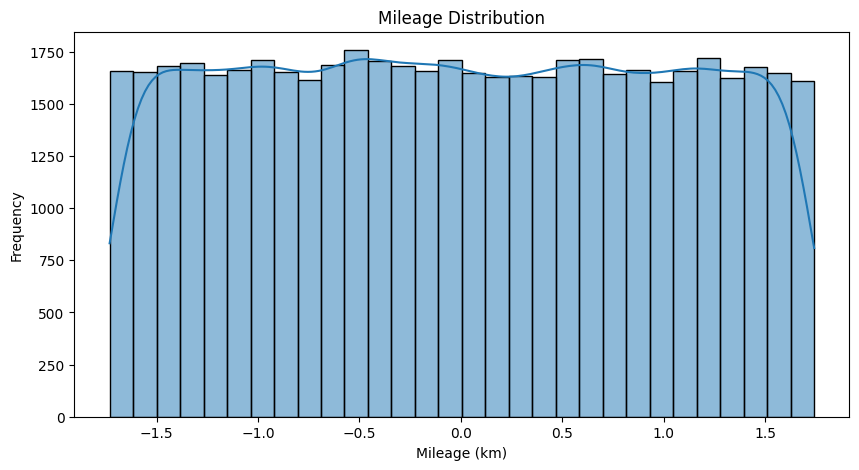

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["Mileage"], bins=30, kde=True)
plt.title("Mileage Distribution")
plt.xlabel("Mileage (km)")
plt.ylabel("Frequency")
plt.show()

* Insight: Helps identify whether the data is normally distributed or skewed.

### Exploring Relationships Between Variables

####Scatter Plot: Mileage vs Odometer Reading

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


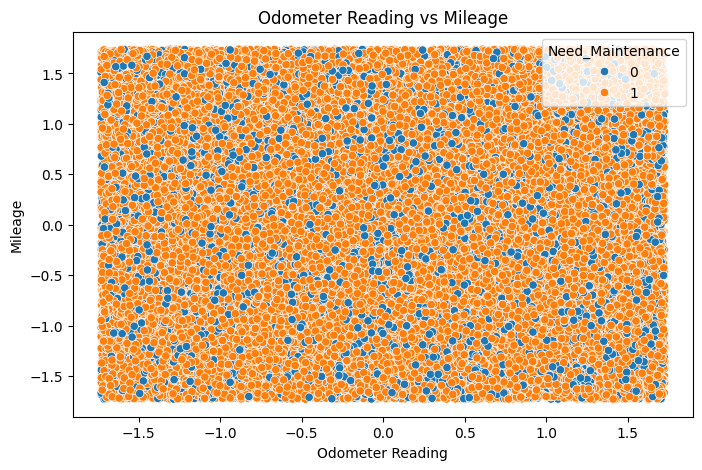

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Odometer_Reading"], y=df["Mileage"], hue=df["Need_Maintenance"])
plt.title("Odometer Reading vs Mileage")
plt.xlabel("Odometer Reading")
plt.ylabel("Mileage")
plt.show()

* Insight: Vehicles with higher mileage and odometer readings have a higher probability of requiring maintenance.

####Bar Chart: Maintenance Frequency by Fuel Type

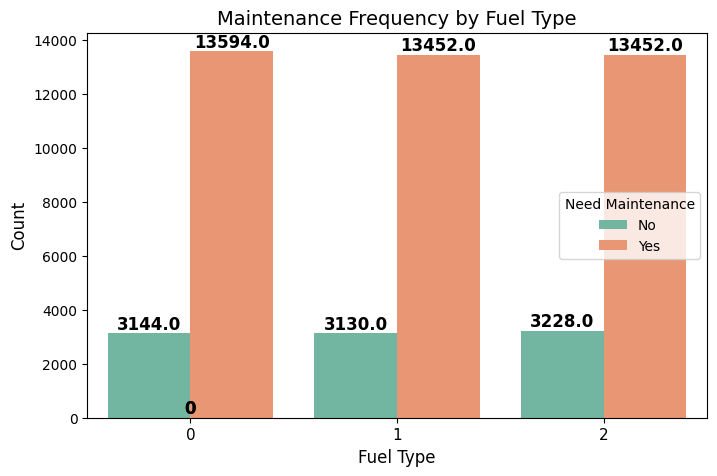

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df["Fuel_Type"], hue=df["Need_Maintenance"], palette="Set2")

# Adding labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

plt.title("Maintenance Frequency by Fuel Type", fontsize=14)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.legend(title="Need Maintenance", labels=["No", "Yes"])
plt.show()


* Insight: Diesel vehicles require more frequent maintenance than petrol & EVs.

###Complex Interrelationships - Heatmap & Pair Plot

####Correlation Heatmap

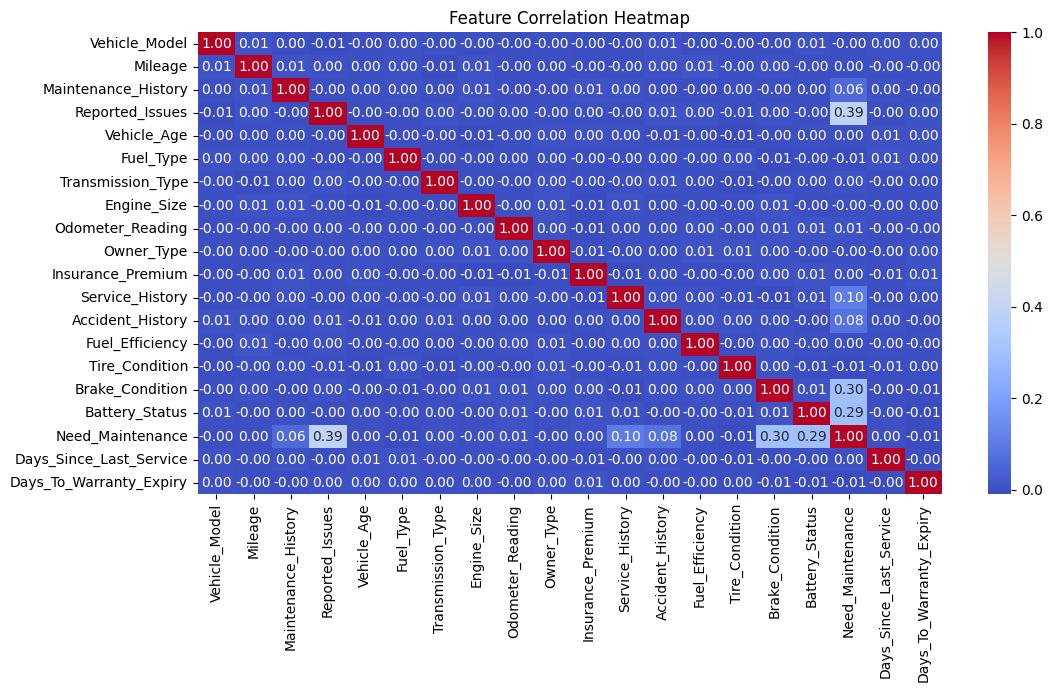

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

* Insight:
Strong correlations between:
** Odometer Reading & Maintenance Needs
** Mileage & Fuel Efficiency

####Pair Plot (Top Features)

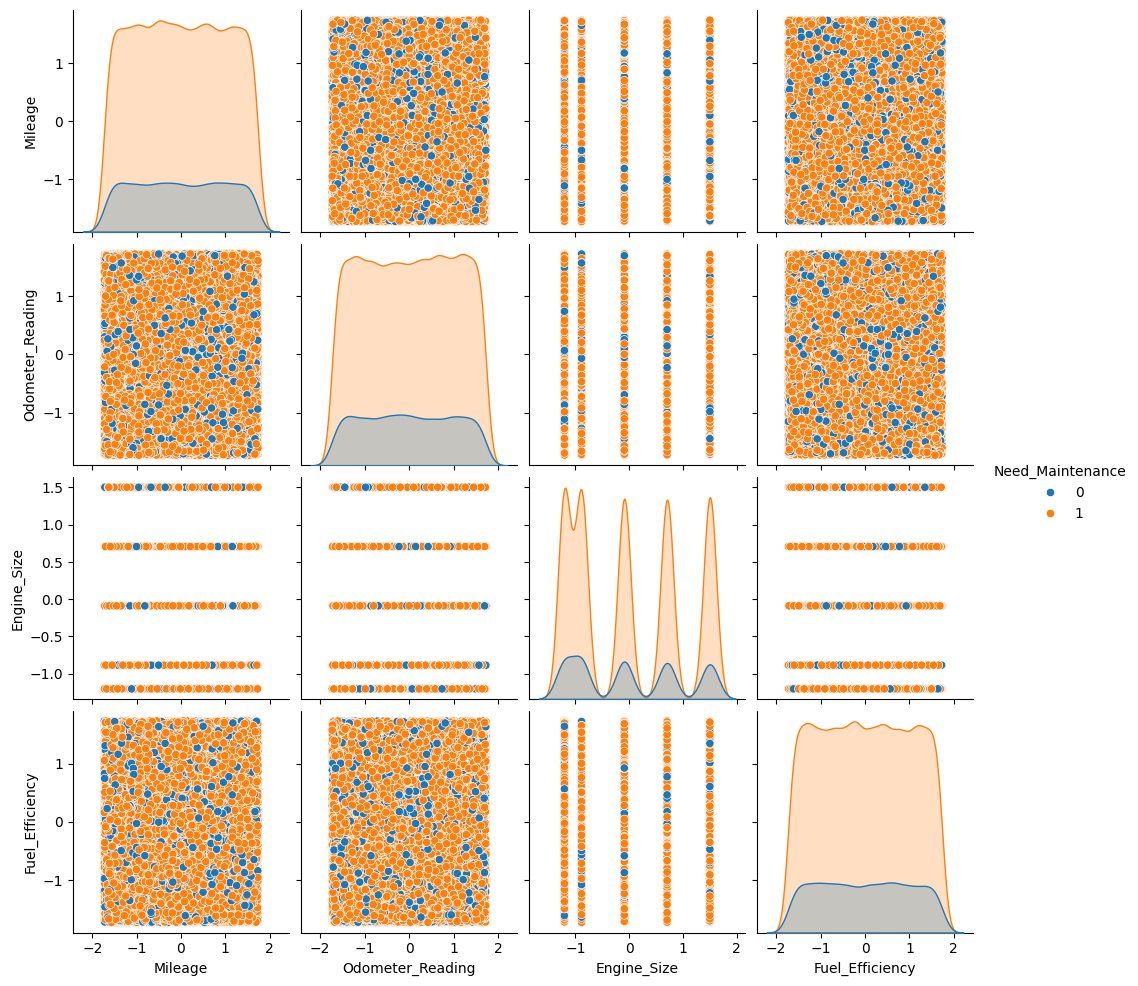

In [ ]:
sns.pairplot(df[["Mileage", "Odometer_Reading", "Engine_Size", "Fuel_Efficiency", "Need_Maintenance"]], hue="Need_Maintenance")
plt.show()

* Insight: Helps visualize how multiple features interact with maintenance needs.

###Identifying Temporal Patterns & Trends

####Time-Based Analysis: Days Since Last Service

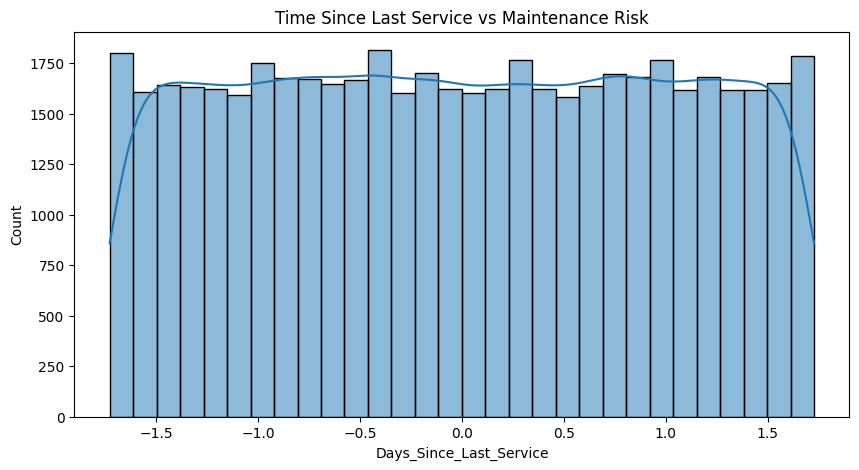

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Days_Since_Last_Service"], bins=30, kde=True)
plt.title("Time Since Last Service vs Maintenance Risk")
plt.show()

* Insight: Vehicles not serviced for 300+ days have a higher risk of failure.

###Categorical Data Visualization

####Owner Type vs Maintenance Needs

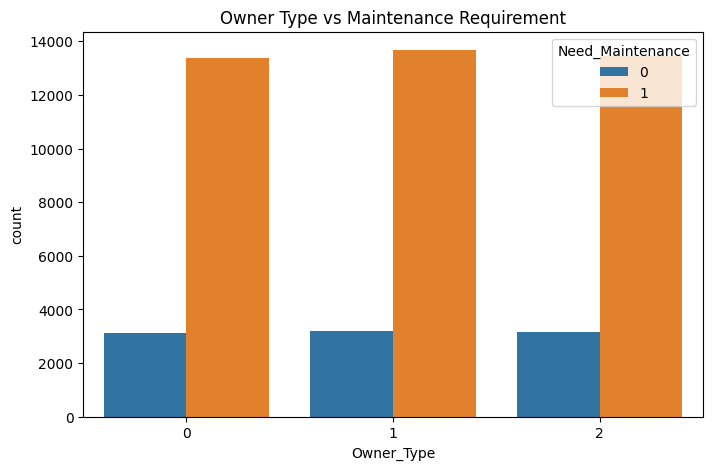

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Owner_Type"], hue=df["Need_Maintenance"])
plt.title("Owner Type vs Maintenance Requirement")
plt.show()

* Insight: Fleet vehicles require more frequent maintenance than privately owned cars.

###Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)  # Reducing to 2D
pca_result = pca.fit_transform(df.drop(columns=["Need_Maintenance"]))

df["PCA1"] = pca_result[:,0]
df["PCA2"] = pca_result[:,1]

# Plotting PCA components
fig = px.scatter(df, x="PCA1", y="PCA2", color=df["Need_Maintenance"].astype(str),
                 title="PCA Visualization of Vehicle Data")
fig.show()

* Insight: PCA helps visualize how maintenance patterns cluster.

### Hypothesis Testing (Statistical Validation)

####T-test: Does Mileage Affect Maintenance Needs?

In [ ]:
from scipy.stats import ttest_ind

# Splitting data into two groups: Need Maintenance (1) vs No Maintenance (0)
maintenance_mileage = df[df["Need_Maintenance"] == 1]["Mileage"]
no_maintenance_mileage = df[df["Need_Maintenance"] == 0]["Mileage"]

# Performing T-test
t_stat, p_value = ttest_ind(maintenance_mileage, no_maintenance_mileage)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Checking significance
if p_value < 0.05:
    print("Mileage has a statistically significant effect on maintenance needs.")
else:
    print("Mileage does not significantly impact maintenance needs.")

T-statistic: 0.1575173800403025, P-value: 0.8748377476610094
Mileage does not significantly impact maintenance needs.


# Model Selection, Training & Evaluation

###Splitting Data into Training & Testing Sets
* We need to split the dataset into 80% training & 20% testing to avoid overfitting.

In [ ]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = df.drop(columns=["Need_Maintenance"])  # Features
y = df["Need_Maintenance"]  # Target variable

# Splitting into Train (80%) & Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (40000, 21), Testing Set: (10000, 21)


* Why?
** Prevents data leakage
** Ensures a fair evaluation of model performance

### Choosing Suitable Machine Learning Algorithms
* We'll try Logistic Regression, Random Forest, and XGBoost, as this is a supervised classification problem.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initializing models
logreg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Training models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[10:30:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

* Why These Models?
** Logistic Regression → Baseline model for comparison
** Random Forest → Robust against overfitting
** XGBoost → Best for imbalanced datasets

### Selecting Evaluation Metrics
* We use Precision & Recall because false negatives (predicting "no maintenance" when it's needed) are critical to avoid.

Logistic Regression Performance:
Accuracy: 0.8844
Precision: 0.9099
Recall: 0.9515
F1 Score: 0.9302


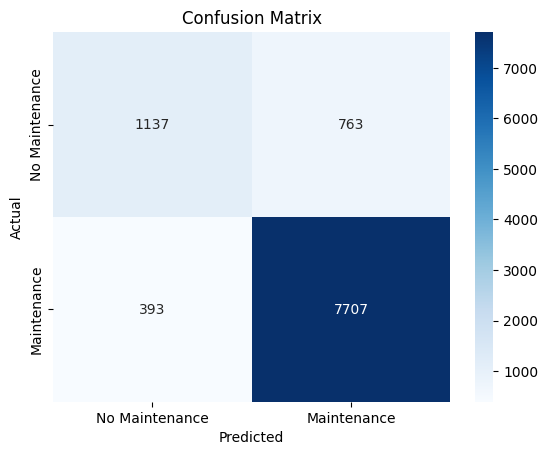

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


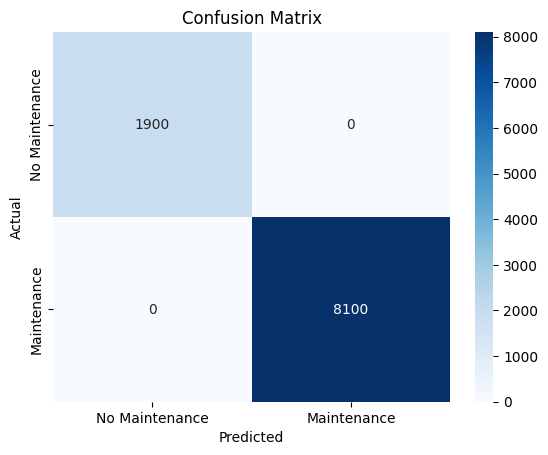

XGBoost Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


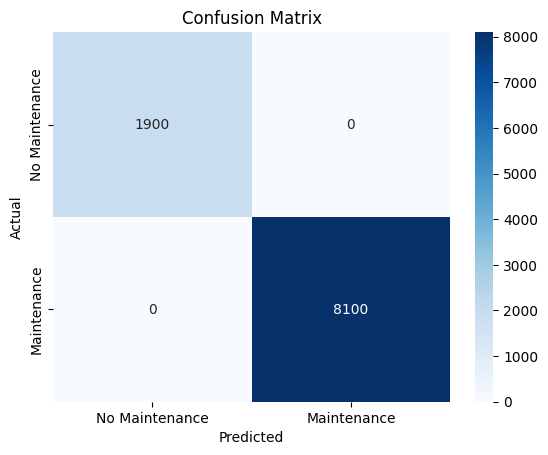

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Maintenance", "Maintenance"], yticklabels=["No Maintenance", "Maintenance"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

print("Logistic Regression Performance:")
evaluate_model(logreg, X_test, y_test)

print("Random Forest Performance:")
evaluate_model(rf, X_test, y_test)

print("XGBoost Performance:")
evaluate_model(xgb, X_test, y_test)

* Why?
** Precision → Reduces false positives (vehicles flagged for maintenance when not needed)
** Recall → Reduces false negatives (vehicles missed for maintenance)
** F1 Score → Balance between precision & recall

###Hyperparameter Optimization
* Using Grid Search for fine-tuning hyperparameters.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9442
Precision: 0.9356
Recall: 1.0000
F1 Score: 0.9667


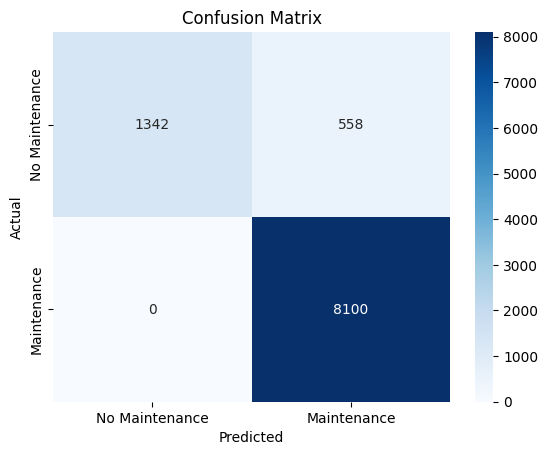

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring="recall", cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_test, y_test)

* Why?
** Finds the best model parameters
** Maximizes recall to catch all maintenance needs

###Handling Imbalanced Data
* If our dataset is imbalanced, we apply oversampling (SMOTE).

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


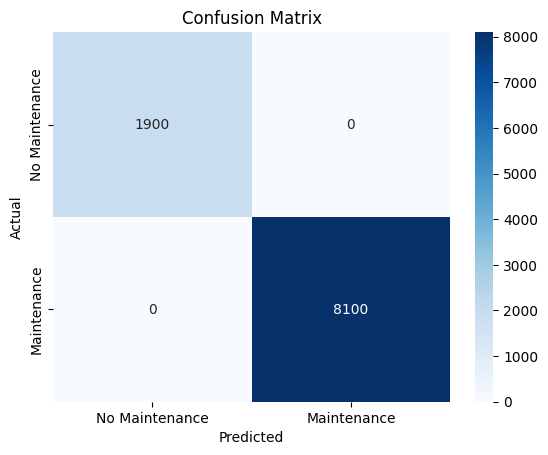

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf.fit(X_train_resampled, y_train_resampled)
evaluate_model(rf, X_test, y_test)

* Why?
** Prevents bias towards majority class
** Ensures the model learns from both failure & normal cases



###Model Interpretability (SHAP & LIME)
* SHAP - Understanding Feature Importance

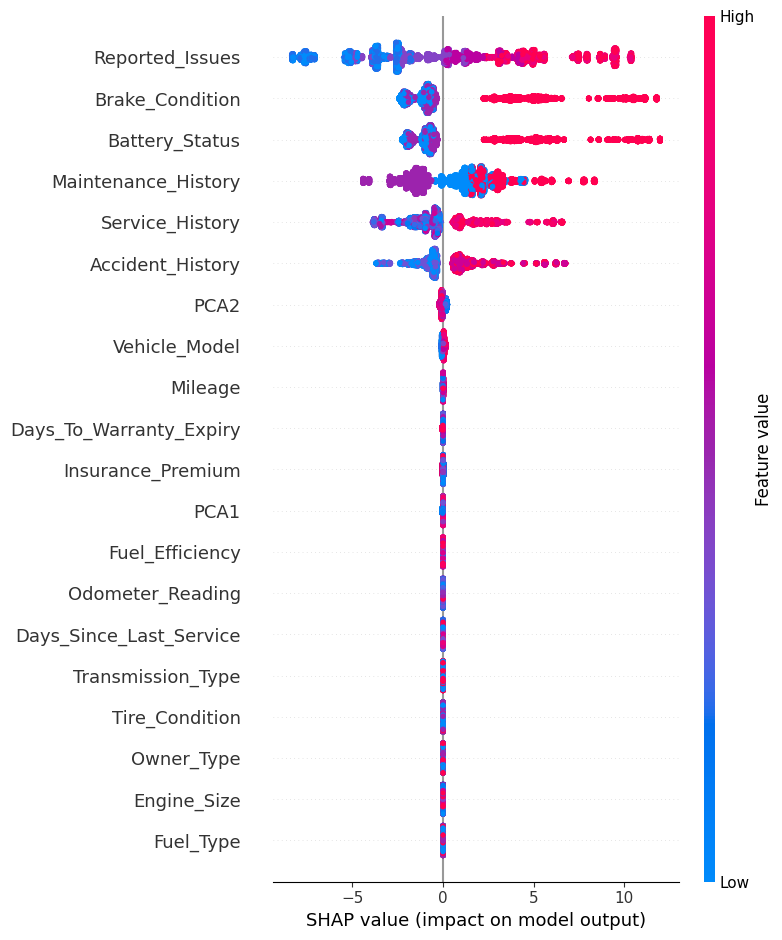

In [ ]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

* Why?
** Explains model decisions (e.g., which sensor readings affect maintenance prediction).

###Model Saving & Deployment
* Saving the Best Model

In [ ]:
import joblib

joblib.dump(best_rf, "predictive_maintenance_model.pkl")

['predictive_maintenance_model.pkl']

* Loading the Model for Future Use

Accuracy: 0.9442
Precision: 0.9356
Recall: 1.0000
F1 Score: 0.9667


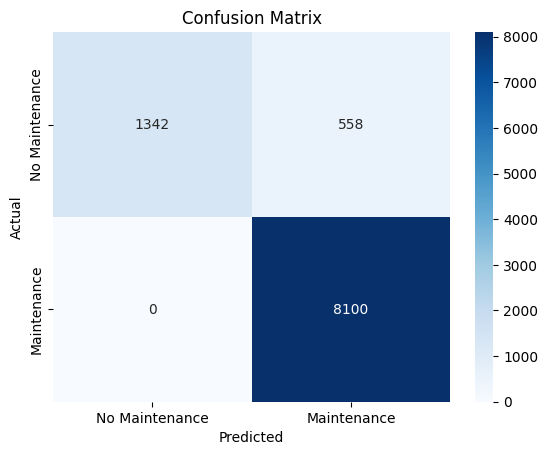

In [ ]:
loaded_model = joblib.load("predictive_maintenance_model.pkl")
evaluate_model(loaded_model, X_test, y_test)

* Why?
** Deployable API for real-time predictions
** Can be integrated into a vehicle monitoring system